## Optimizing the function $f(m_1, m_2)$
$f(m_1, m_2) = \frac{(m_1 + m_2)^{2a} - m_1^{2a} - m_2^{2a}}{2(m_1m_2)^a}$

We constrained $m_1 + m_2 = 1$ because $f$ is homogeneous ($f(km_1, km_2) = f(m_1, m_2)$ for all $k > 0$) and $f$ is symmetric in $m_1$ and $m_2$.


This notebook contains numerical experiments and plots for the angles bound. The final plots are generated with scripts in "experiment_scripts", this file contains only some preliminary computations.

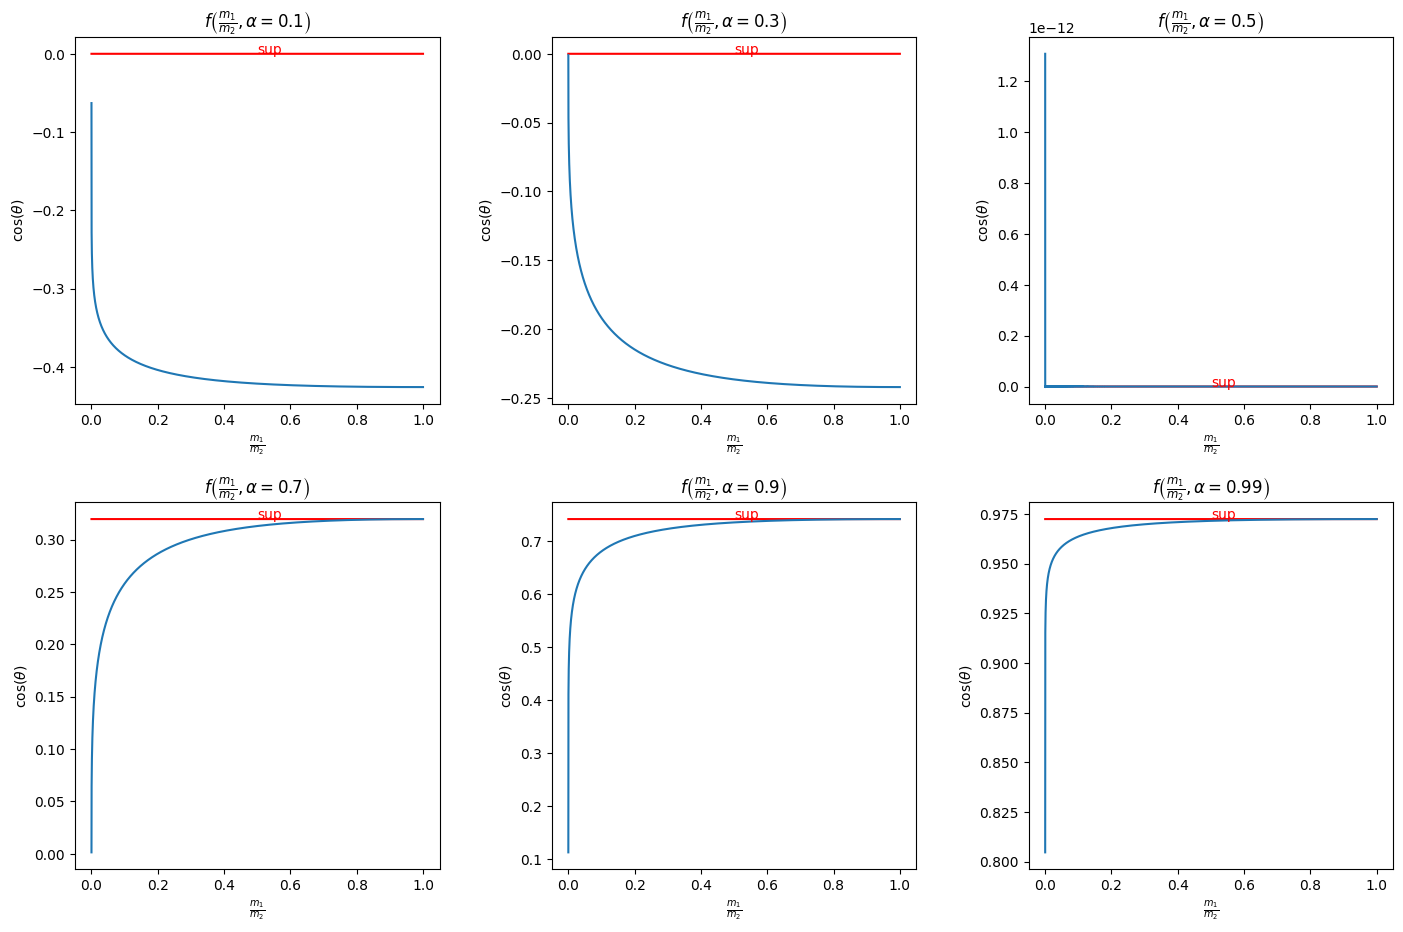

In [6]:
import matplotlib.pyplot as plt
import numpy as np


def f_sum_normalized(x, a):
    return (1 - x ** (2 * a) - (1 - x) ** (2 * a)) / (2 * (x * (1 - x)) ** a)


def f_sum_fixed2(m1, a):
    return ((1 + m1) ** (2 * a) - 1 - m1 ** (2 * a)) / (2 * m1 ** a)


eps = 1e-9
a_values = [.1, .3, .5, .7, .9, .99]

fig, axs = plt.subplots(2, 3, figsize=(15, 10))
fig.tight_layout(pad=5.0)

for i, a in enumerate(a_values):
    x = np.linspace(0 + eps, 1 - eps, 10000)
    y = f_sum_fixed2(x, a)
    ax = axs[i // 3, i % 3]

    y_max = [np.maximum(0, 2 ** (2 * a - 1) - 1)] * len(x)

    ax.plot(x, y_max, color='red')
    ax.text(.5, y_max[0], 'sup', color='red')

    ax.plot(x, y)
    ax.set_title(r'$f\left(\frac{m_1}{m_2}, \alpha=' +str(a) + r'\right)$')
    ax.set_xlabel(r'$\frac{m_1}{m_2}$')
    ax.set_ylabel(r'$\cos(\theta)$')
plt.show()


In [7]:
import sympy as sp

x = sp.symbols('x')
a = sp.symbols('a', real=True, positive=True)
f = (1 - x ** (2 * a) - (1 - x) ** (2 * a)) / (2 * (x * (1 - x)) ** a)
f_prime = f.diff(x).simplify()
f_prime

a*(-2*x + x**(2*a) - (1 - x)**(2*a) + 1)/(2*x*(x*(1 - x))**a*(x - 1))

In [8]:
# We check that the derivative is 0 at x = 1/2

f_prime.subs(x, 1 / 2)

0

In [9]:
def f_sum(m1, m2, a):
    return ((m1 + m2) ** (2 * a) - m1 ** (2 * a) - m2 ** (2 * a)) / (2 * (m1 * m2) ** a)

### Behaviour for $\alpha < 1/2$

In [10]:
# plot f_sum for m1, m2, in 3d, also color based on elevation
a = .3
m1 = np.linspace(0 + eps, 1 - eps, 100)
m2 = np.linspace(0 + eps, 1 - eps, 100)
M1, M2 = np.meshgrid(m1, m2)
Z = f_sum(M1, M2, a)


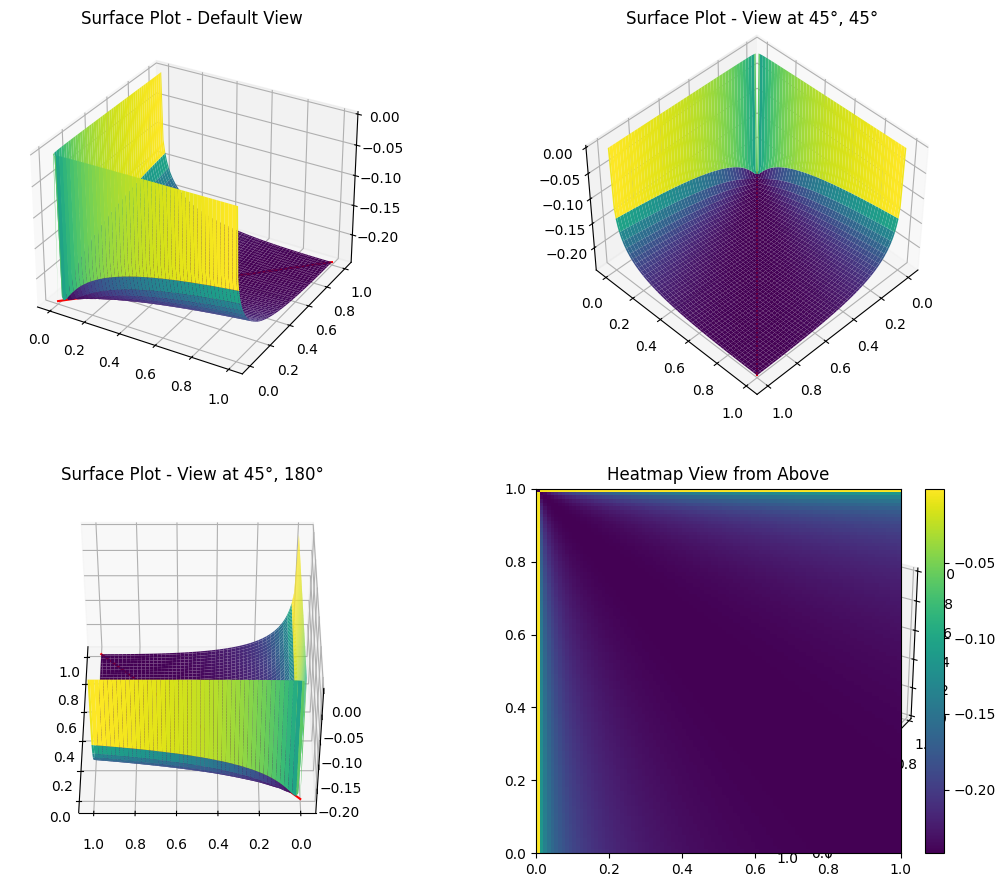

In [11]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10), subplot_kw={'projection': '3d'})

# First plot (default view)
ax = axes[0, 0]
ax.plot_surface(M1, M2, Z, cmap='viridis')
m = np.linspace(0 + eps, 1 - eps, 100)
ax.plot(m, m, f_sum(m, m, a), color='red')
ax.set_title("Surface Plot - Default View")

# Second plot (view at 45, 45)
ax = axes[0, 1]
ax.plot_surface(M1, M2, Z, cmap='viridis')
ax.plot(m, m, f_sum(m, m, a), color='red')
ax.view_init(elev=45, azim=45)
ax.set_title("Surface Plot - View at 45°, 45°")

# Third plot (view at 45, 180)
ax = axes[1, 0]
ax.plot_surface(M1, M2, Z, cmap='viridis')
ax.plot(m, m, f_sum(m, m, a), color='red')
ax.view_init(elev=45, azim=180)
ax.set_title("Surface Plot - View at 45°, 180°")

# Fourth plot (heatmap)
ax = fig.add_subplot(2, 2, 4)
plt.imshow(Z, cmap='viridis', extent=(0., 1., 0., 1.))
plt.colorbar(ax=ax)
ax.set_title("Heatmap View from Above")

plt.tight_layout(pad=5)
plt.show()

### Behaviour for $\alpha > 1/2$

In [12]:
# plot f_sum for m1, m2, in 3d, also color based on elevation
a = .7
m1 = np.linspace(0 + eps, 1 - eps, 100)
m2 = np.linspace(0 + eps, 1 - eps, 100)
M1, M2 = np.meshgrid(m1, m2)
Z = f_sum(M1, M2, a)


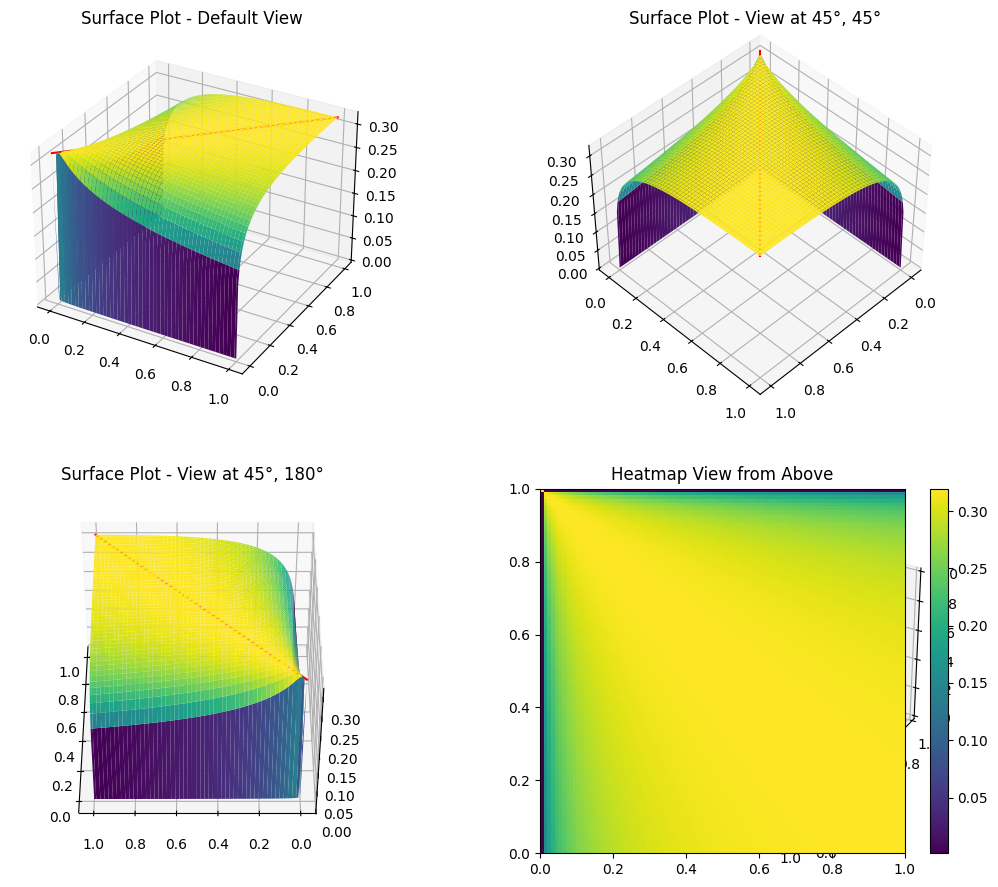

In [13]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10), subplot_kw={'projection': '3d'})

# First plot (default view)
ax = axes[0, 0]
ax.plot_surface(M1, M2, Z, cmap='viridis')
m = np.linspace(0 + eps, 1 - eps, 100)
ax.plot(m, m, f_sum(m, m, a), color='red')
ax.set_title("Surface Plot - Default View")

# Second plot (view at 45, 45)
ax = axes[0, 1]
ax.plot_surface(M1, M2, Z, cmap='viridis')
ax.plot(m, m, f_sum(m, m, a), color='red')
ax.view_init(elev=45, azim=45)
ax.set_title("Surface Plot - View at 45°, 45°")

# Third plot (view at 45, 180)
ax = axes[1, 0]
ax.plot_surface(M1, M2, Z, cmap='viridis')
ax.plot(m, m, f_sum(m, m, a), color='red')
ax.view_init(elev=45, azim=180)
ax.set_title("Surface Plot - View at 45°, 180°")

# Fourth plot (heatmap)
ax = fig.add_subplot(2, 2, 4)
plt.imshow(Z, cmap='viridis', extent=(0., 1., 0., 1.))
plt.colorbar(ax=ax)
ax.set_title("Heatmap View from Above")

plt.tight_layout(pad=5)
plt.show()

## Optimizing the function 
$f(m_1, m_2) = \frac{(m_1 - m_2)^{2a} - m_1^{2a} - m_2^{2a}}{2(m_1m_2)^a}$

This time we do a different normalization

In [14]:
def f_diff_comp(m1, m2, a):
    return ((m1 - m2) ** (2 * a) - m1 ** (2 * a) - m2 ** (2 * a)) / (2 * (m1 * m2) ** a)

In [15]:
# plot f_sum for m1, m2, in 3d, also color based on elevation
a = .7
m1 = np.linspace(0 + eps, 1 - eps, 100)
m2 = np.linspace(0 + eps, 1 - eps, 100)

# make mesh but only with m1 > m2
M1, M2 = np.meshgrid(m1, m2)
Z = f_diff_comp(M1, M2, a)


/tmp/ipykernel_282465/3372350604.py:2: RuntimeWarning: invalid value encountered in power
  return ((m1 - m2) ** (2 * a) - m1 ** (2 * a) - m2 ** (2 * a)) / (2 * (m1 * m2) ** a)


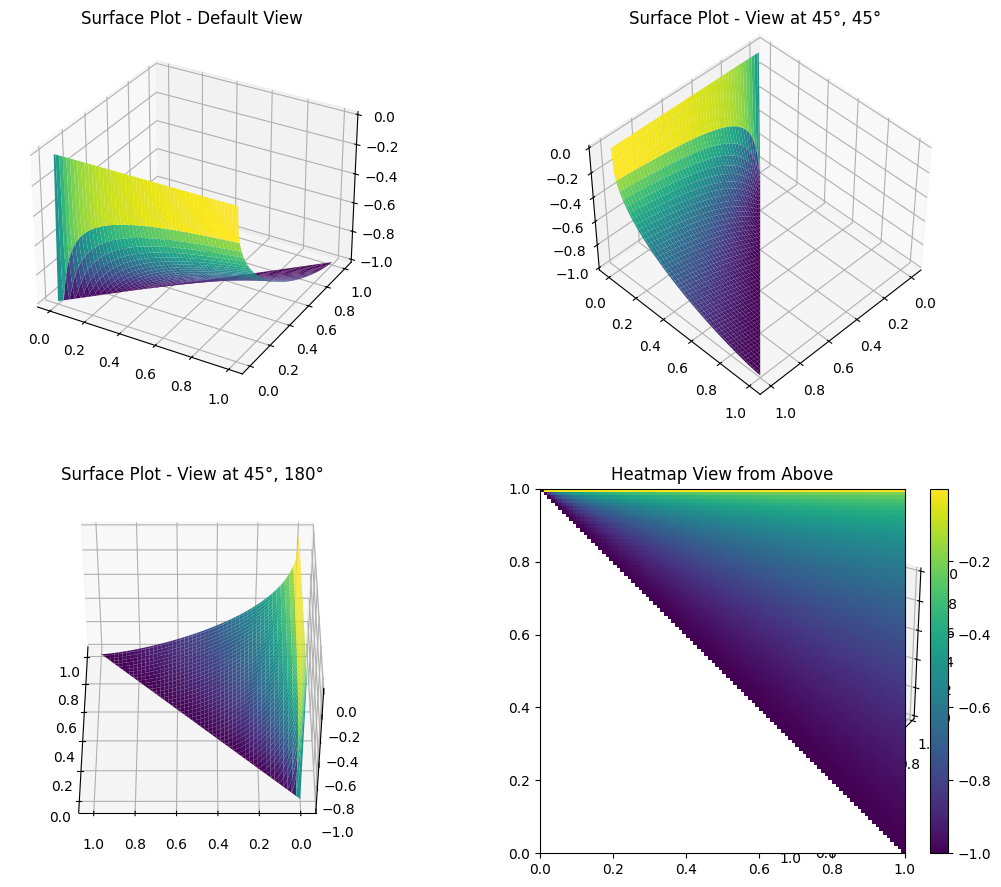

In [16]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10), subplot_kw={'projection': '3d'})

# First plot (default view)
ax = axes[0, 0]
ax.plot_surface(M1, M2, Z, cmap='viridis')
m = np.linspace(0 + eps, 1 - eps, 100)
ax.set_title("Surface Plot - Default View")

# Second plot (view at 45, 45)
ax = axes[0, 1]
ax.plot_surface(M1, M2, Z, cmap='viridis')
ax.view_init(elev=45, azim=45)
ax.set_title("Surface Plot - View at 45°, 45°")

# Third plot (view at 45, 180)
ax = axes[1, 0]
ax.plot_surface(M1, M2, Z, cmap='viridis')
ax.view_init(elev=45, azim=180)
ax.set_title("Surface Plot - View at 45°, 180°")

# Fourth plot (heatmap)
ax = fig.add_subplot(2, 2, 4)
plt.imshow(Z, cmap='viridis', extent=(0., 1., 0., 1.))
plt.colorbar(ax=ax)
ax.set_title("Heatmap View from Above")

plt.tight_layout(pad=5)
plt.show()

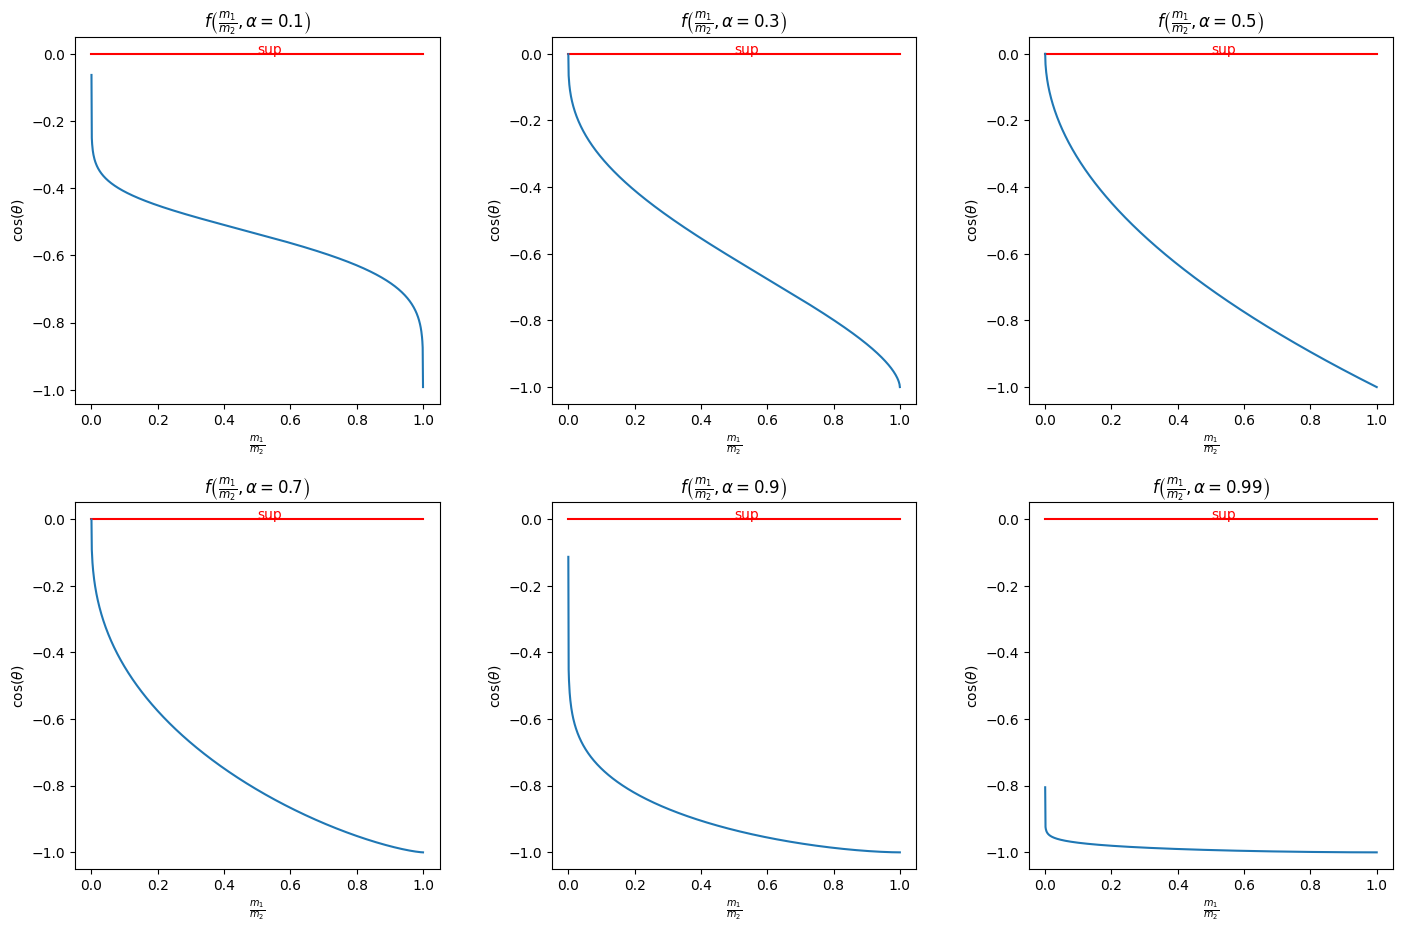

In [17]:
def plot_f(m1, a):
    return f_diff_comp(1, m1, a)


fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# add spacing 
fig.tight_layout(pad=5.0)
a_values = [.1, .3, .5, .7, .9, .99]
for i, a in enumerate(a_values):
    m2 = np.linspace(0 + eps, 1 - eps, 1000)
    y = plot_f(m2, a)
    ax = axs[i // 3, i % 3]

    # also plot max(0, 2^(2a-1) - 1)

    y_max = [np.maximum(0, 2 ** (2 * a - 1) - 1)] * len(m2)
    y_max = [0] * len(m2)
    ax.plot(m2, y_max, color='red')
    # annotate "sup" on this line
    ax.text(.5, y_max[0], 'sup', color='red')

    ax.plot(m2, y)

    ax.set_title(r'$f\left(\frac{m_1}{m_2}, \alpha=' +str(a) + r'\right)$')
    ax.set_xlabel(r'$\frac{m_1}{m_2}$')
    ax.set_ylabel(r'$\cos(\theta)$')

plt.show()

In [18]:
m = sp.symbols("m", real=True, positive=True)
a = sp.symbols("a", real=True, positive=True)

f_diff = ((1 - m) ** (2 * a) - 1 - m ** (2 * a)) / (2 * m ** a)
f_diff_prime = f_diff.diff(m).simplify()

f_diff_prime

a*m**(-a - 1)*(m*(1 - m)**(2*a) + m + m**(2*a) - m**(2*a + 1) + (1 - m)**(2*a) - 1)/(2*(m - 1))